In [2]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# 7 Assests (Nvidia, Advanced Micro Devices, Gamestop, Walt Disney Co, Pfizer inc, Costco, Target Corp)
tickers =['NVDA','AMD','GME','DIS','PFE','COST','TGT']
etfs=['spy','iwm','dia']

tickers, etfs = [ticker.upper() for ticker in tickers], [
    etf.upper() for etf in etfs
]
# Gathers asset's data from past 10 years (3650 days) to today 
start_date = dt.datetime.today() - pd.Timedelta(3650, "d")
end_date = dt.datetime.today()

#Downloads stock data
tickers_data =yf.download (start=start_date,end=end_date, tickers= tickers + etfs)['Adj Close']
tickers_data.head()

analysis = pd.DataFrame(index=tickers)

#Portfolio Wieght (must be equally weighted!) = 1/7 (since there are seven assests)
analysis['Portfolio Weight']= 100/len(tickers)

/var/folders/q9/1h42_3tn705_j_750qfm6dz00000gn/T/ipykernel_17909/1450376751.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[*********************100%%**********************]  10 of 10 completed


In [3]:
daily_returns = tickers_data.pct_change()

# drops row with NaN values: the value of the first row because the numerator = 0 
# when calculating daily returns since there is no data from previous day to calculate for the next day.
daily_returns = daily_returns.drop(index = daily_returns.index[0], axis=0, inplace=False) 
daily_returns

/var/folders/q9/1h42_3tn705_j_750qfm6dz00000gn/T/ipykernel_17909/1266183261.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = tickers_data.pct_change()


Ticker,AMD,COST,DIA,DIS,GME,IWM,NVDA,PFE,SPY,TGT
Date,,,,,,,,,,
2014-05-12,0.025840,0.009707,0.006516,0.005735,0.007112,0.022721,0.029363,0.003444,0.009736,0.008625
2014-05-13,0.015113,-0.001888,0.001500,-0.004125,0.027974,-0.009775,-0.016147,0.002403,0.000896,-0.001342
2014-05-14,-0.012407,-0.006944,-0.005628,-0.014133,-0.036724,-0.016243,-0.009846,-0.003425,-0.004738,-0.004869
2014-05-15,-0.005025,-0.006775,-0.009391,-0.009515,-0.016182,-0.006751,-0.005525,-0.001374,-0.008780,-0.018390
2014-05-16,0.015152,0.011019,0.002931,0.002994,0.009758,0.006337,-0.002222,0.002065,0.003468,0.007906
...,...,...,...,...,...,...,...,...,...,...
2024-04-29,0.017789,-0.003908,0.003897,-0.005766,-0.051260,0.008066,0.000251,0.009449,0.003541,-0.006131
2024-04-30,-0.011361,-0.004722,-0.014773,-0.008744,-0.017715,-0.020304,-0.015440,-0.000780,-0.015841,-0.016796
2024-05-01,-0.089090,-0.000941,0.002010,-0.005581,-0.016231,0.002093,-0.038900,0.060890,-0.003247,-0.028264


In [4]:
# Column 3: Calculates annualized volatility trailing over 3-months 
volatility_three = daily_returns[tickers][-63:].std() * (252 ** (1/2)) * 100

# Drop NaN values from the trailing window
volatility_three[tickers]
print(volatility_three)
analysis['Annualized Volatility'] = volatility_three

Ticker
NVDA    59.431387
AMD     52.679481
GME     77.143393
DIS     30.290507
PFE     25.902237
COST    21.681986
TGT     32.041471
dtype: float64


source for Columns 4-6: https://www.youtube.com/watch?v=_8DZxoEwpwE

In [5]:
# Slices daily returns to gather data trailing 12 months
daily_returns= daily_returns[-252:] #252 days to 1 year's worth of trading days
daily_returns

#--------------------------------Beta against SPY
covariance = daily_returns.cov()
variance = np.var(daily_returns['SPY'])
beta =[] 

for i in tickers:
    asset_beta = covariance.loc[i,'SPY']/variance
    beta.append(asset_beta)

print('beta vs spy:',beta)
analysis['Beta vs SPY']=beta

#----------------------------------Beta against IWM 
covariance2= daily_returns.cov()
variance2= np.var(daily_returns['IWM'])
beta2 =[] 

for i in tickers:
    asset_beta2 = covariance2.loc[i,'IWM']/variance2
    beta2.append(asset_beta2)
print('beta vs iwm:', beta2)
analysis['Beta vs IWM']=beta2

#----------------------------------Beta against DIA
covariance3= daily_returns.cov()
variance3= np.var(daily_returns['DIA'])
beta3 =[] 

for i in tickers:
    asset_beta3 = covariance3.loc[i,'DIA']/variance3
    beta3.append(asset_beta3)
print('beta vs dia',beta3)
analysis['Beta vs DIA']=beta3

beta vs spy: [2.452050593311803, 2.248372272012528, 1.734408164380444, 0.8084068577230931, 0.335594699074149, 0.794775643092276, 0.6261525824028017]
beta vs iwm: [0.5101891587403223, 0.7231797561811422, 1.4356003098939556, 0.4988423162210117, 0.24010130723272935, 0.2537333615807743, 0.526491667051346]
beta vs dia [1.3040991712374757, 1.3391492894102939, 1.8120373804803775, 1.0685319540881377, 0.6250833268023301, 0.7968040008823767, 0.9892914067767989]


In [6]:
#Columns 7+8: Average and max weekly drawdowns
def drawdowns(values):
        
    # Weekly min and max calculations
    weekly_min = values.rolling(5).min()
    weekly_max = values.rolling(5).max()

    # Weekly drawdown calculations for the latest year
    weekly_dd = ((weekly_min - weekly_max) / weekly_max)[-252:] * 100

    # Calculate mean and max for the latest year
    return weekly_dd.mean(), weekly_dd.min()

analysis['Avg weekly Drawdown'], analysis['Max weekly Drawdown'] = drawdowns(tickers_data)

print(analysis)

      Portfolio Weight  Annualized Volatility  Beta vs SPY  Beta vs IWM  \
NVDA         14.285714              59.431387     2.452051     0.510189   
AMD          14.285714              52.679481     2.248372     0.723180   
GME          14.285714              77.143393     1.734408     1.435600   
DIS          14.285714              30.290507     0.808407     0.498842   
PFE          14.285714              25.902237     0.335595     0.240101   
COST         14.285714              21.681986     0.794776     0.253733   
TGT          14.285714              32.041471     0.626153     0.526492   

      Beta vs DIA  Avg weekly Drawdown  Max weekly Drawdown  
NVDA     1.304099            -5.867431           -23.866265  
AMD      1.339149            -6.141448           -15.881306  
GME      1.812037            -7.922222           -27.225808  
DIS      1.068532            -3.310684           -12.565586  
PFE      0.625083            -3.118273            -9.207786  
COST     0.796804          

In [7]:
#Column9: total returns trailing 10 years
current_price= (tickers_data[tickers].iloc[-1]) # Returns the latest price for each asset 

starting_price= tickers_data[tickers].iloc[0] #returns the starting price for each asset


for i in tickers:
    total_return=(((current_price-starting_price)/starting_price)*100).round(2)
total_return=total_return.dropna() 
   
print(total_return)

#Total Returns
analysis['Total Returns']= total_return

Ticker
NVDA    21359.56
GME       110.12
DIS        53.62
COST      706.23
TGT       253.15
dtype: float64


In [8]:
starting_price= tickers_data[tickers].iloc[0] #returns the starting price for each asset
starting_price

for i in tickers:
    total_return=(((current_price-starting_price)/starting_price)*100).round(2)
total_return=total_return.dropna() 
   
print(total_return)

#Total Returns
analysis['Total Returns']= total_return

Ticker
NVDA    21359.56
GME       110.12
DIS        53.62
COST      706.23
TGT       253.15
dtype: float64


In [9]:
#Column 10: Annualized Total returns
annual_return = (((1+total_return)**(252/2520)-1)*100).round(2)
print(annual_return)

#Annualized Total Return
analysis['Annualized Total Return']= annual_return

Ticker
NVDA    170.99
GME      60.17
DIS      49.19
COST     92.73
TGT      73.98
dtype: float64


In [10]:
analysis

,Portfolio Weight,Annualized Volatility,Beta vs SPY,Beta vs IWM,Beta vs DIA,Avg weekly Drawdown,Max weekly Drawdown,Total Returns,Annualized Total Return
NVDA,14.285714,59.431387,2.452051,0.510189,1.304099,-5.867431,-23.866265,21359.56,170.99
AMD,14.285714,52.679481,2.248372,0.723180,1.339149,-6.141448,-15.881306,NaN,NaN
GME,14.285714,77.143393,1.734408,1.435600,1.812037,-7.922222,-27.225808,110.12,60.17
DIS,14.285714,30.290507,0.808407,0.498842,1.068532,-3.310684,-12.565586,53.62,49.19
PFE,14.285714,25.902237,0.335595,0.240101,0.625083,-3.118273,-9.207786,NaN,NaN
COST,14.285714,21.681986,0.794776,0.253733,0.796804,-2.359625,-9.102710,706.23,92.73
TGT,14.285714,32.041471,0.626153,0.526492,0.989291,-3.586024,-18.982663,253.15,73.98


Table #2

In [11]:
#Column 1: 
tickers_data[etfs]
portfolio_risk=pd.DataFrame(index=etfs)


In [12]:
#Calculates equally weighted portfolio returns 

daily_returns["equal_weight"]= daily_returns[tickers].mean(axis=1) # using axis=1, calculates the mean going across each row
tickers_data["equal_weight"]= tickers_data[tickers].mean(axis=1) 

#Column 2: 1 yr Correlation between ETFs and equally weighted portfolio
portfolio_risk['Correlation']=daily_returns[-252:].corr().equal_weight

#column 3: 1 yr Covarriance between ETFs and equally weighted portfolio
portfolio_risk['Covarriance']= daily_returns[-252:].cov().equal_weight*10000


/var/folders/q9/1h42_3tn705_j_750qfm6dz00000gn/T/ipykernel_17909/850825956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_returns["equal_weight"]= daily_returns[tickers].mean(axis=1) # using axis=1, calculates the mean going across each row


In [13]:
# Gather returns data 10 years
trailing_returns = tickers_data.pct_change()

# Calculate trailing portfolio returns
trailing_portfolio_return = trailing_returns[tickers].mean(axis=1) #axis=1 computes along row-wise

# Gathers trailing returns into ETF 
trailing_etf_returns = trailing_returns[etfs]

# Formula: Tracking error = stan.dev(portfolio returns - benchmark returns)

    #Difference between tickers returns and etf returns
tracking_errors = trailing_etf_returns.sub(trailing_portfolio_return, axis=0)# axis=0 computes alongcolumn-wise

    #Standard deviation of tracking errors 
tracking_errors_std = tracking_errors.std()

# Adds tracking error column to the portfolio_risk dataframe as a percentage
portfolio_risk['Tracking Error'] = tracking_errors_std

/var/folders/q9/1h42_3tn705_j_750qfm6dz00000gn/T/ipykernel_17909/2531801620.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  trailing_returns = tickers_data.pct_change()


In [14]:
#Sharpe ratio
#Riskfree rate: 5.17% over 1 yr
RF=0.0513/252

#Gather 1yr of returns data
trailing_etf_returns= trailing_etf_returns[-252:]

#Volatility
volatility = trailing_etf_returns.std() * (252 ** (1/2))

sharpe_ratio=(trailing_etf_returns.rolling(5).mean()- RF)*5/volatility
sharpe_ratio=sharpe_ratio.mean(axis=0)
portfolio_risk['Sharpe Ratio'] = sharpe_ratio

In [15]:
#Annualized Volatility Spread
etf_volatility = daily_returns[etfs].std() * (252 ** (1/2))
port_volatility = daily_returns['equal_weight'].std() * (252 ** (1/2))
av_spread= port_volatility-etf_volatility
portfolio_risk['Volatility Spread']= av_spread

In [16]:
portfolio_risk

,Correlation,Covarriance,Tracking Error,Sharpe Ratio,Volatility Spread
SPY,0.712488,0.696414,0.012345,0.031315,0.093341
IWM,0.560364,0.925684,0.013142,0.012182,0.012558
DIA,0.540095,0.453876,0.013268,0.021138,0.109758


<Axes: xlabel='Ticker', ylabel='Ticker'>

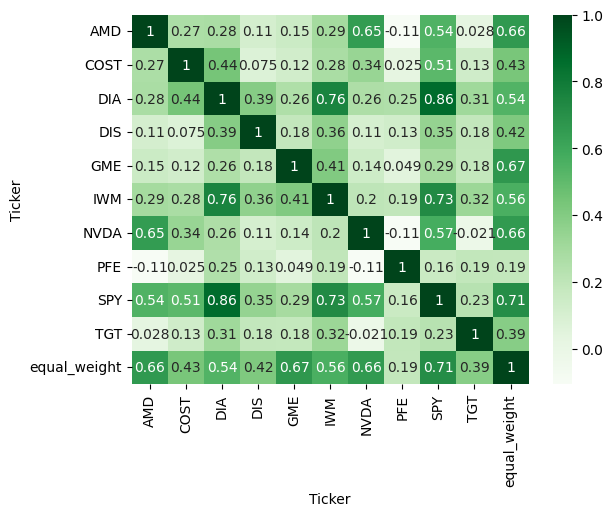

In [17]:
#Correlation Matrix
sns.heatmap(daily_returns[-252:].corr(), cmap= 'Greens',annot=True)